# Plot the scatter and elbow point graphs by using KNN and scatter graph using K-means methods.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
heart_dataset=pd.read_csv('heart.csv',skipinitialspace=True)
adult_dataset = pd.read_csv('adult.csv',skipinitialspace=True)

In [3]:
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
adult_dataset.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
# Renaming columns 
adult_dataset.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'captialgain', 'capitalloss',
       'hoursperweek', 'native-country', 'class']

In [6]:
adult_dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,captialgain,capitalloss,hoursperweek,native-country,class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
heart_dataset.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [8]:
adult_dataset.info()
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   gender          32560 non-null  object
 10  captialgain     32560 non-null  int64 
 11  capitalloss     32560 non-null  int64 
 12  hoursperweek    32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  class           32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report , accuracy_score

In [10]:
adult_dataset_encoded = pd.get_dummies(data=adult_dataset,columns=adult_dataset.select_dtypes(include=[object]).columns,drop_first=True)

In [11]:
adult_dataset_encoded.head()

,age,fnlwgt,education-num,captialgain,capitalloss,hoursperweek,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,class_>50K
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [12]:
adult_dataset_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Columns: 101 entries, age to class_>50K
dtypes: int64(6), uint8(95)
memory usage: 4.4 MB


In [13]:
X = adult_dataset_encoded.drop('class_>50K',axis=1)
y = adult_dataset_encoded['class_>50K']
Xheart = heart_dataset.iloc[:,:-1].values
yheart = heart_dataset.iloc[:,13].values

# Heart Dataset

In [14]:
X_trainh, X_testh, y_trainh, y_testh =  train_test_split(Xheart,yheart,test_size = 0.25, random_state= 0)

In [15]:
sc_X = StandardScaler()
X_trainh = sc_X.fit_transform(X_trainh)
X_testh = sc_X.transform(X_testh)

In [16]:
# finding value of k using elbow method
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_trainh,y_trainh)
 pred_i = knn.predict(X_testh)
 error_rate.append(np.mean(pred_i != y_testh))

Text(0, 0.5, 'Error Rate')

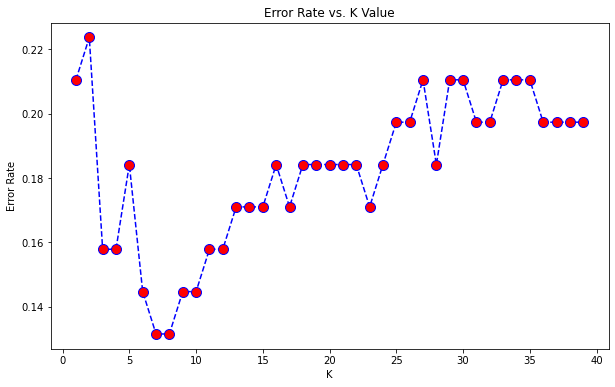

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [18]:
#k=7 can be treated as a elbow point here
#So We choose k = 7 as an elbow point here
classifierh = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifierh = classifierh.fit(X_trainh,y_trainh)

In [19]:
y_predh = classifierh.predict(X_testh)

In [20]:
print("Classification Report for KNN(Heart Dataset)")
print(classification_report(y_testh,y_predh))

Classification Report for KNN(Heart Dataset)
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.85      0.93      0.89        43

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.86        76
weighted avg       0.87      0.87      0.87        76



# Adult Dataset

In [21]:
X_scaled = StandardScaler().fit_transform(X)

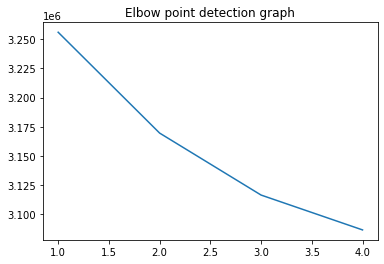

In [22]:
# finding value of k using elbow method
inertia = []
for k in range(1,5):
    k_cluster = KMeans(n_clusters=k)
    k_cluster.fit_transform(X_scaled)
    inertia.append(k_cluster.inertia_)

plt.plot(range(1,5),inertia)
plt.title("Elbow point detection graph")
plt.show()

In [23]:
#k=2 can be treated as a elbow point here
#So We choose k = 2 as an elbow point here
cluster_model = KMeans(n_clusters=2,random_state=15)
cluster_model.fit(X)

KMeans(n_clusters=2, random_state=15)

In [24]:
K_means_pred = cluster_model.labels_

In [25]:
print("Classification Report for K means Clustering(Adult Dataset)")
print(classification_report(y,K_means_pred))

Classification Report for K means Clustering(Adult Dataset)
              precision    recall  f1-score   support

           0       0.75      0.74      0.75     24719
           1       0.23      0.24      0.23      7841

    accuracy                           0.62     32560
   macro avg       0.49      0.49      0.49     32560
weighted avg       0.63      0.62      0.62     32560



# Elbow  point and Scatter Graphs of Heart dataset

Text(0, 0.5, 'Error Rate')

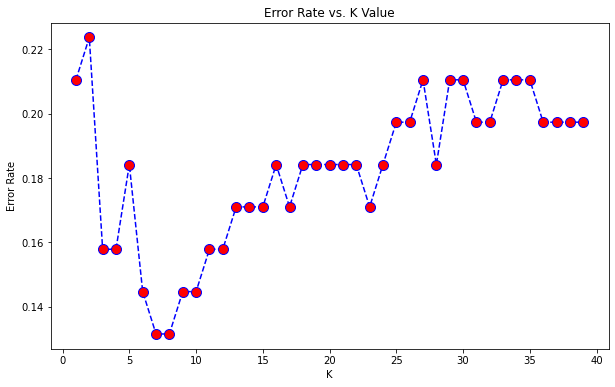

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

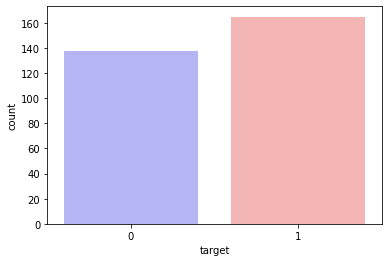

In [27]:
#k=7 can be treated as a elbow point here
#So We choose k = 7 as an elbow point here


import seaborn as sns
sns.countplot(x="target", data=heart_dataset, palette="bwr")
plt.show()

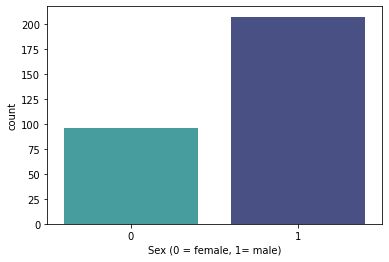

In [28]:
sns.countplot(x='sex', data=heart_dataset, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

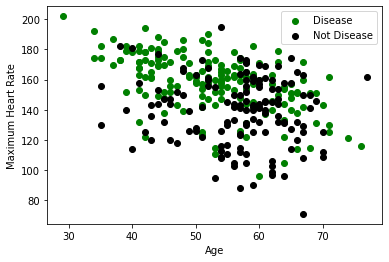

In [29]:
plt.scatter(x=heart_dataset.age[heart_dataset.target==1], y=heart_dataset.thalach[(heart_dataset.target==1)], c="green")
plt.scatter(x=heart_dataset.age[heart_dataset.target==0], y=heart_dataset.thalach[(heart_dataset.target==0)], c = 'black')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

# Elbow point and Scatter Graphs of adult dataset

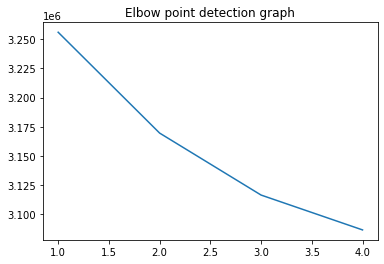

In [30]:
plt.plot(range(1,5),inertia)
plt.title("Elbow point detection graph")
plt.show()

In [31]:
#k=2 can be treated as a elbow point here
#So We choose k = 2 as an elbow point here


num_cols = adult_dataset._get_numeric_data().columns
adult_dataset['pred'] = K_means_pred

C:\Users\karnk\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\karnk\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\karnk\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\karnk\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


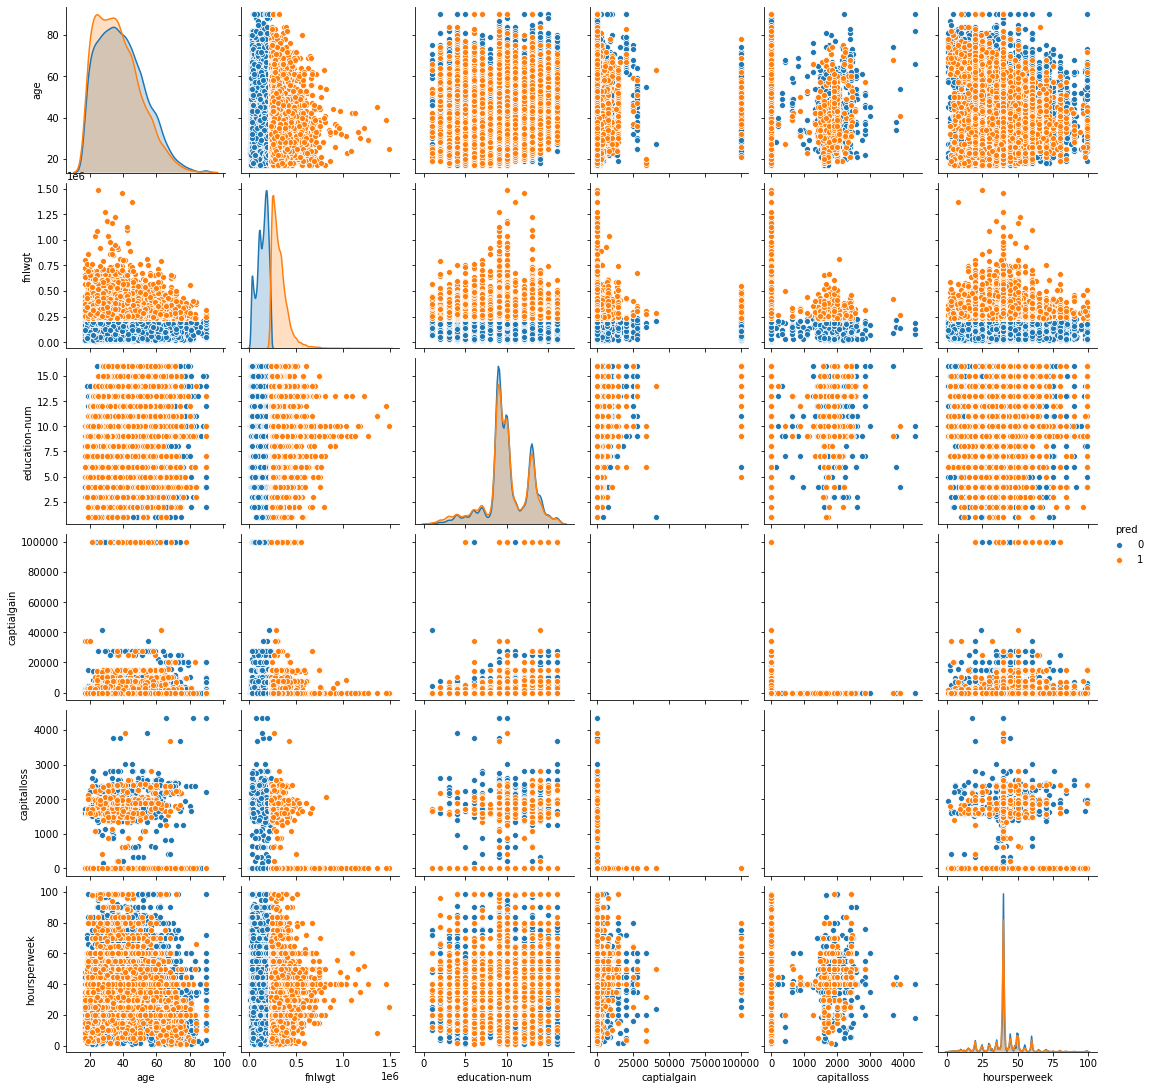

In [32]:
sns.pairplot(data=adult_dataset,vars=num_cols,hue='pred')

C:\Users\karnk\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\karnk\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\karnk\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\karnk\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


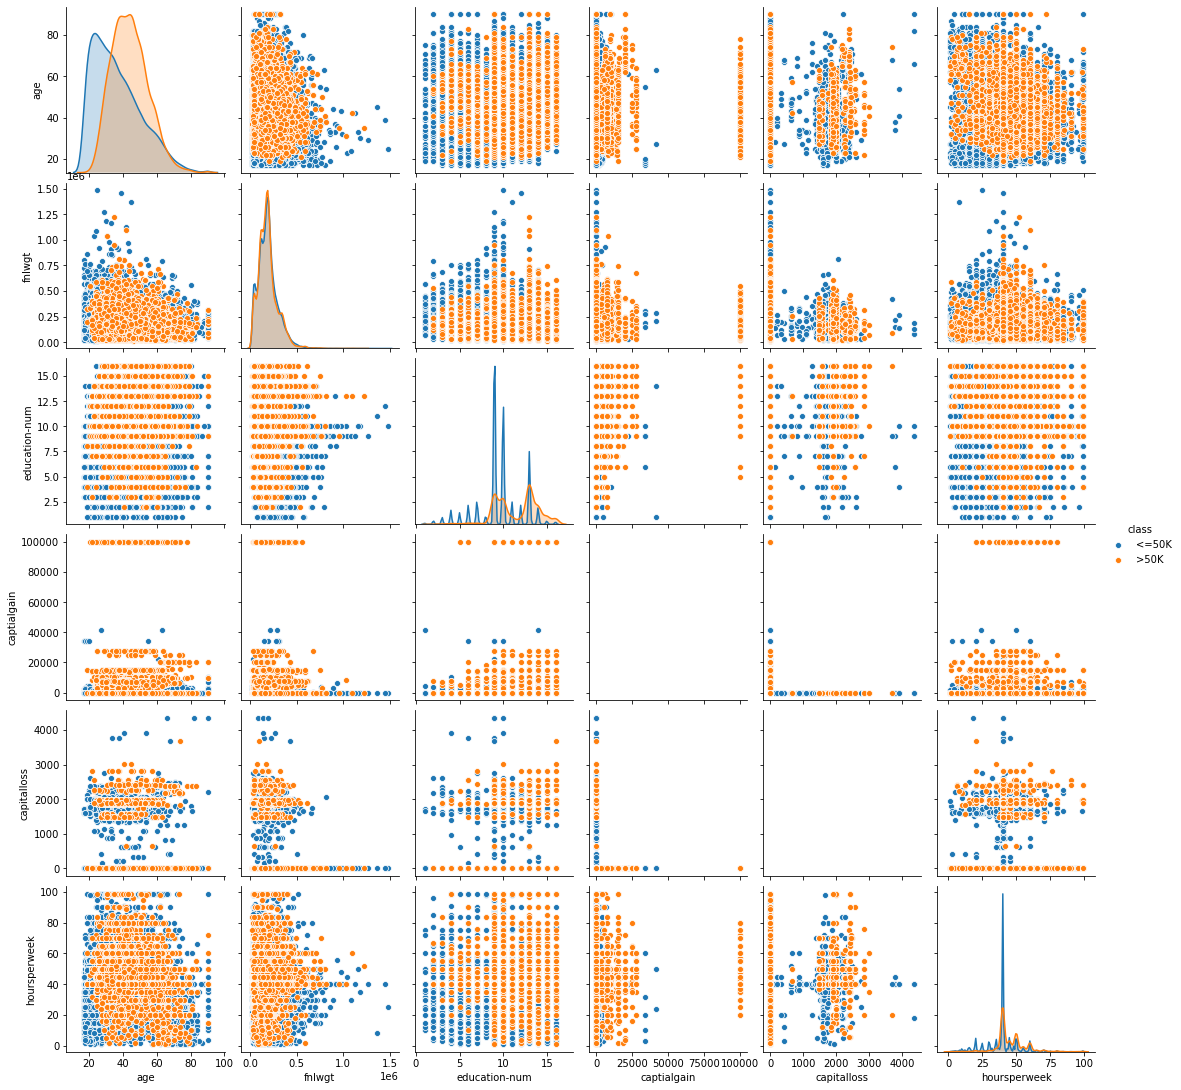

In [33]:
# Actual values
sns.pairplot(data=adult_dataset,vars=num_cols,hue='class')